<a href="https://colab.research.google.com/github/biagioliluca/PytorchLabs/blob/master/labs/01_Tensor_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning & Applied AI

# Tutorial 1: Tensor manipulation

In this tutorial, we will cover:

- PyTorch Tensors: creation, gpu tensors, shape manipulation, indexing

Prerequisites:

- Python

Authors:

- Based on an original notebook by Dr. Antonio Norelli (norelli@di.uniroma1.it, now at Oxford University).

Course:

- Website and notebooks will be available at https://erodola.github.io/DLAI-s2-2024/



## Welcome to the Deep Learning and Applied AI lab sessions!
During the lab sessions, you will be guided through one or more Python notebooks that teach you deep learning tools and provide opportunities to apply what you have learned in class.

We encourage you to form small groups of 2-3 people to read and discuss the notebooks together.

Run the code and play with it! It is very easy to edit the code locally and make small experiments. Try whatever comes to your mind, this is the best way to learn! Python notebooks are designed to be used in this way, that's why we chose them for the DLAI lab sessions.

There will be some exercises, try to do them by yourself, and when everyone in your group has finished, compare the solutions with each other.

When something is not clear or you have a question, raise your hand and we will come to you.

Some sections in the notebooks are marked with 📖. This is deepening content for further reading outside of class. You may want to go through it at home or during class if you finish early. (Some sections are "more optional" than others, those are marked with more books 📖📖)

Let's start!

## Introduction

Many Deep Learning frameworks have emerged for python. Arguably the most notable ones in 2024 are **PyTorch**, **TensorFlow** (with keras frontend) and **Jax**.
We will use PyTorch, which is [the leading DL framework](https://thegradient.pub/state-of-ml-frameworks-2019-pytorch-dominates-research-tensorflow-dominates-industry/) for research and [continues to gain popularity](https://openai.com/blog/openai-pytorch/).

The fundamental data structure of these frameworks is the **tensor**, which is more or less the same everywhere. _A solid understanding of how tensors work is required in deep learning_ and will definitely come in handy in other areas.

The first two tutorials will give you solid basics of tensors and operations between tensors.

## Wait, wait, wait... what is this strange web page with code and text cells all around?

It is called Colab, an environment to play with python notebooks directly in your web browser, made by Google. If you never used Colab before, take a look to the following cells, adapted from the official [Colab guide](https://colab.research.google.com/notebooks/welcome.ipynb).



### Getting started with Colab

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

## Numpy

The adoptive father of Python's deep learning frameworks is Numpy, the historical library which added support for large, multi-dimensional arrays and matrices to Python.

As we will see, modern deep learning frameworks (and especially PyTorch) have drawn largely from Numpy's API, while at the same time overcoming its limitations such as the absence of GPU support or automatic differentiation. The student has become the master.

![img](https://i.imgur.com/KaUdmee.png)

We will mainly use PyTorch tensors for implementing our Deep Learning systems, but knowing how to use Numpy remains very important. Note that:

- **Numpy arrays** and **PyTorch tensors** are very similar, most of the features that we will explain for PyTorch tensors apply also to Numpy arrays.
- In real DL systems you need to constantly switch between PyTorch and Numpy.

If you have prior knowledge of matrix manipulation in Matlab, we recommend the [numpy for Matlab users page](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html) as a useful resource.




In [3]:
import numpy as np

## PyTorch

During the course we'll use and learn many parts of PyTorch API.
You should also familiarize with the [PyTorch Documentation](https://pytorch.org/docs/stable/) as it will greatly assist you.




In [2]:
import torch
torch.__version__

'2.5.1+cu124'

### **PyTorch Tensor**

The ``Tensor`` class is very similar to numpy's ``ndarray`` and provides most of its functionality.


However, it also has two important distinctions:

- ``Tensor`` supports GPU computations.
- ``Tensor`` may store extra information needed for back-propagation:
  - The gradient tensor w.r.t. some variable (e.g. the loss)
  - A node representing an operation in the computational graph that produced this tensor.

We will study back-propagation in a future lecture.

Keep in mind:

- Usually **tensor operations are not in-place**.

#### **Tensor instantiation**

A tensor represents an n-dimensional grid of values, **all of the same type**.

In [ ]:
# Basic tensor creation from python lists
x = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.int32)

# x[1][2] = tensor 6.., is a tensor of rank 0
# x[1,2] is same
x[1,:]

tensor([4, 5, 6], dtype=torch.int32)

In [ ]:
# Some other tensor construction methods
torch.zeros((3,5))

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [ ]:
torch.ones((2,5), dtype=torch.float64)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]], dtype=torch.float64)

In [ ]:
torch.eye(4)

tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

In [ ]:
torch.rand((2,2))  # from which distribution are these random numbers sampled? Check the PyTorch documentation

tensor([[0.8244, 0.7822],
        [0.9472, 0.9263]])

**Pro tip**: Bookmark the [PyTorch docs](https://pytorch.org/docs/stable/).

In [ ]:
torch.randint(0, 100, (3,3))

tensor([[32, 23, 22],
        [68, 83, 23],
        [73, 56, 32]])

In [ ]:
t = torch.rand((3, 3))
torch.ones_like(t)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

One can easily convert to/from Numpy tensors:

In [ ]:
t = torch.rand((3, 3), dtype=torch.float32)
t.numpy()

array([[0.566459  , 0.6681506 , 0.68747395],
       [0.52512515, 0.68516   , 0.6863352 ],
       [0.04021662, 0.8912915 , 0.9033921 ]], dtype=float32)

In [ ]:
n = np.random.rand(3,3).astype(np.float16)
torch.from_numpy(n)

tensor([[0.4297, 0.8145, 0.6338],
        [0.6777, 0.7861, 0.1090],
        [0.3259, 0.1318, 0.2273]], dtype=torch.float16)

There are many other functions available to create tensors!

> **EXERCISE**
>
> Create a matrix $M \in \mathbb{R}^{3 \times 3}$ that is filled with 2 along the diagonal and 1 elsewhere, that is:
>
> $$
m_{ij} =
\begin{cases}
2 & \text{if } i = j \\
1 & \text{otherwise}
\end{cases}
$$

In [ ]:
# 📝 write your solution in this cell
x = torch.ones((3,3))
y = torch.eye(3)
x+y

tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]])

In [ ]:
# @title 👀 Solution


torch.ones((3,3)) + torch.eye(3)

#### **Tensor properties**

The **type** of a tensor is the type of each element contained in the tensor:

In [ ]:
t = torch.rand((3, 3))
t.dtype

torch.float32


The **shape** of a tensor is a tuple of integers giving the size of the tensor along each dimension, e.g. for a matrix $M \in \mathbb{R}^{3 \times 5}$:

In [ ]:
t = torch.rand((3,5))
t.shape

torch.Size([3, 5])

The **device** of a tensor indicates the memory in which the tensor is currently stored: RAM (denoted as ``cpu``) or GPU memory (denoted as ``cuda``)

In [ ]:
t = torch.rand((3,5))
t = t.to('cuda') # operazioni non sono in place (mycode)
t.device

device(type='cuda', index=0)

In [ ]:
#mycode
print(torch.cuda.is_available())  # Should print True
print(torch.cuda.device_count())  # Should be > 0
print(torch.cuda.get_device_name(0))  # Should show GPU name

True
1
Tesla T4


> **EXERCISE**
>
> Given a matrix $X \in \mathbb{R}^{m \times n}$, create another matrix $Y \in \mathbb{R}^{m \times 3}$ filled with ones using $X$.

In [ ]:
# Exercise variables
X = torch.rand(100,42)
X = X[:,:3]
X = torch.ones_like(X)
X

# Your solution:
# Y = ?

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1

In [ ]:
# @title 👀 Solution


torch.ones((X.shape[0], 3))

#### **Using the GPU**

Thanks to the explosion of the videogame industry in the last 50 years, the performance of the chips specialized in rendering and processing graphics --known as GPUs-- has dramatically improved.

In 2007 NVidia realized the potential of parallel GPU computing outside the videogame world, and released the first version of the CUDA framework, allowing  software developers to use GPUs for general purpose processing.

Graphics operations are mostly linear algebra operations, and accelerating them can turn very useful in many other fields.

In 2012 Hinton et al. [demonstrated](https://en.wikipedia.org/wiki/AlexNet) the huge potential of GPUs in training deep neural networks, starting *de facto* the glorious days of deep learning.

In [ ]:
# @title GPUs are very powerful

from IPython.display import YouTubeVideo, HTML, display

display(YouTubeVideo('-P28LKWTzrI?t=14'))

In [ ]:
# Check if the GPU is available
torch.cuda.is_available()

In [ ]:
# If available use the GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

In [ ]:
t = torch.rand((3,3))
t = t.to(device)  # Note that we are assigning back to t, otherwise t won't be updated!
t

In [ ]:
# Construct tensors directly on the GPU memory
t = torch.ones((5, 5), device='cuda')
t

In [ ]:
t = torch.rand((3,3))

# Other shortcuts to transfer tensors between devices

# Be careful of hardcoded cuda calls: the code will not run if a GPU is not available
t = t.cuda()
t

In [ ]:
t = t.cpu()
t

In [4]:
# Utility function to print tensors nicely. We will use this all the time.

from typing import Union, Sequence

def print_arr(
    *arr: Sequence[Union[torch.Tensor, np.ndarray]], prefix: str = ""
) -> None:
    """
    Pretty print tensors, together with their shape and type

    :param arr: one or more tensors
    :param prefix: prefix to use when printing the tensors
    """
    print(
        "\n\n".join(
            f"{prefix}{str(x)} <shape: {x.shape}> <dtype: {x.dtype}>" for x in arr
        )
    )

t = torch.rand((3,3), dtype=torch.float32)
print_arr(t, prefix='My tensor = ')

My tensor = tensor([[0.4828, 0.3806, 0.2861],
        [0.9799, 0.1621, 0.2006],
        [0.6448, 0.4346, 0.9666]]) <shape: torch.Size([3, 3])> <dtype: torch.float32>


#### 📖 **Tensor rank**

In Numpy and PyTorch, the **rank of a tensor** denotes the number of dimensions. For example, any matrix is a tensor of rank 2.

Don't confuse this with the rank of a matrix, which has a completely different meaning in linear algebra!

- **rank-0** tensors are just scalars

In [ ]:
t0 = torch.tensor(3, dtype=torch.double)

print_arr(t0)  # notice torch.Size in the printed output

In [ ]:
item = t0.item()  # convert the tensor scalar to a python base type
item, type(item)

In [ ]:
# Be careful, a non-scalar tensor cannot be converted with an .item() call
try:
  x = torch.ones(3).item()
except RuntimeError as e:
  print('Error:', e)

- **rank-1** tensors are sequences of numbers. A sequence of length ``n`` has the shape ``(n,)``

In [ ]:
# A rank-1 tensor
t1 = torch.tensor([1, 2, 3])

print_arr(t1)

In [ ]:
# A rank-1 tensor with a single scalar
print_arr(torch.tensor([42]))

PyTorch and NumPy are smart: if a tensor is not rank-0 but can be converted to a rank-0 tensor, then the .item() will work.

This operation is called **broadcasting**, we will see it in detail in the next notebooks.

In [ ]:
# A rank-1 tensor with a single element can be converted to a rank-0 tensor
torch.tensor([42]).item()

> **NOTE**
>
> Don't be too hopeful about mapping Pytorch concepts onto mathematical concepts.
>
> There isn’t a distinction in Pytorch between row vectors and column vectors: both are just rank-1 tensors!

- **rank-2** tensors have the shape ``(n, m)``

In [ ]:
t2 = torch.tensor([[1, 2, 3], [4, 5, 6]])

print_arr(t2)

Again, it doesn't make sense to talk about the "rows" and "columns" of rank-2 tensors.

In [ ]:
# element (i,j) of a rank-2 tensor just means the j-th element of the i-th rank-1 tensor
t2[1, 2].item()

In [ ]:
# To mimick the notion of a column vector from linear algebra, we can use a rank-2 tensor
t_col = t1.reshape(-1, 1)

print_arr(t_col)

In [ ]:
# ...and similarly for row vectors
t_row = t1.reshape(1, -1)

print_arr(t_row)

In [ ]:
# This way, we the standard matrix product will work only if the dimensions match

t = torch.ones(10)  # rank-1 tensor

t_row = t.reshape(1, -1)  # rank-2 'row vector'
t_col = t.reshape(-1, 1)  # rank-2 'column vector'

_ = t_row @ torch.ones(10, 3)  # does not work with t_col
_ = torch.ones(3, 10) @ t_col  # does not work with t_row

# Notice that the matrix product still does the right thing if we multiply by the rank-1 tensor

_ = t @ torch.ones(10, 3)
_ = torch.ones(3, 10) @ t

- **rank-k** tensors have a shape of $(n_1, \dots, n_k)$

In [ ]:
print_arr(torch.zeros((2, 3, 4)))

In [ ]:
print_arr(torch.ones((2, 2, 2, 2)))

> **EXERCISE**
>
> Build a tensor $X \in \mathbb{R}^{k \times k}$ filled with zeros and the sequence $[0, ..., k-1]$ along the diagonal

In [ ]:
# your solution
k = 12

In [ ]:
# @title 👀 Solution


k = 12
X = torch.diag(torch.arange(k))
print_arr(X)

> **EXERCISE**
>
> What is the shape of the following tensor?
>
> ```python
> torch.tensor(
>     [
>         [[1.0, 1.0, 1.0],
>          [1.0, 1.0, 1.0]],
>
>         [[1.0, 1.0, 1.0],
>          [1.0, 1.0, 1.0]],
>
>         [[1.0, 1.0, 1.0],
>          [1.0, 1.0, 1.0]],
>
>         [[1.0, 1.0, 1.0],
>          [1.0, 1.0, 1.0]],
>     ]
> )
> ```



In [ ]:
# Think about it, then confirm your answer by writing code here

### **Changing and adding dimensions**

PyTorch provides several functions to manipulate tensor shapes


#### **Transpose dimension**

In [ ]:
a = torch.ones((3, 5))
a[0, -1] = 0  # index -1 denotes the last element, as in common python indexing
print("a: ")
print_arr(a)

In [ ]:
a.T

In [ ]:
a.transpose(1, 0)  # Swap dimension 1 and 0

In [ ]:
torch.einsum('ij -> ji', a)  # transpose using Einstein notation

# In the next notebook we will explain the Einstein notation in detail

#### 📖 Transpose in k-dimensions and in Numpy


In [ ]:
a = torch.ones((2, 3, 6))
a[1, 2, 4] = 42
print_arr(a)

In [ ]:
a.transpose(2, 1)

In [ ]:
torch.einsum('ijk->ikj', a)

Shortcuts are handy, but your code becomes less readable.
Most of the time readability is the most important goal to aim for!

What do you think `a.T` will do to our rank-3 tensor? Once you have your hypothesis, test it here:

In [ ]:
a.T

This is confusing even after reading the docs!

Lesson learned: Prefer readable code to short code.

> **NOTE**
>
> In Numpy the transpose function is different!
>
> PyTorch:
> `torch.transpose(input, dim0, dim1) → Tensor`
>
> NumPy:
> `numpy.transpose(a, axes=None) -> numpy.ndarray`
>
> Compare the docs from [numpy](https://numpy.org/doc/stable/reference/generated/numpy.transpose.html) and [pytorch](https://pytorch.org/docs/stable/generated/torch.transpose.html)
>
> In PyTorch the transpose swaps two dimensions. In NumPy you can specify a complete mapping to change all the dimensions.

In [ ]:
a = np.arange(10).reshape(2, 5)
a

In [ ]:
a.transpose(1, 0)

In [ ]:
a.transpose(0, 1)

In [ ]:
torch.from_numpy(a).transpose(0, 1)

In [ ]:
# The einsum is cross platform. It works with consistent semantics
# pretty much everywhere: PyTorch, NumPy, TensorFlow, Jax, ...
# We will see the power of einsum in the next lab
np.einsum('ij -> ji', a)

#### **Reshape**

Another important feature is **reshaping** a tensor into different dimensions

- We need to make sure to **preserve the same number of elements**.
- `-1` in one of the dimensions means **"figure it out"**.


❌❌❌ Pay attention that **transposing and reshaping are two fundamentally different operations**:

In [ ]:
a = torch.arange(12).reshape(3,4 )
a

In [ ]:
# The classical transpose
a.t()

In [ ]:
# Reshape into the transpose shape
a.reshape(4, 3)

#### 📖 **What is `reshape` really doing?**



Think of the `reshape` operation as unrolling the tensor **row-wise**, to obtain a rank-1 tensor *(matlab users: matlab unrolls **column-wise**, pay attention when converting code!)*. Then it stores the values in this tensor following the specified dimensions.

```python
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
```
$-$ unrolling $ \to $

```python
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
```

Then, reading the target shape from right to left, organize the values into the dimensions:

- e.g. reshape into `[4, 3]`:

```python
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
```

$-$ organize in groups of $3$ $ \to $

```python
tensor([[0,  1,  2],  [3,  4,  5],  [6,  7,  8],  [9, 10, 11]])
```

$-$ organize in groups of $4$ $ \to $

```python
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

# same shape of corresponding transpose, but the values are stored differently!
```

- e.g. reshape into `[2, 2, 3]`:

```python
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
```

$-$ organize in groups of $3$ $ \to $

```python
tensor([[0,  1,  2],  [3,  4,  5],  [6,  7,  8],  [9, 10, 11]])
```

$-$ organize in groups of $2$ $ \to $

```python
tensor([[[0,  1,  2],  [3,  4,  5]],  [[6,  7,  8],  [9, 10, 11]]])
```

$-$ organize in groups of $2$ $ \to $

```python
tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]])
```

In [6]:
a = torch.arange(12)
print_arr(a)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]) <shape: torch.Size([12])> <dtype: torch.int64>


In [ ]:
a.reshape(6, 2)

In [ ]:
a.reshape(2, 6)

In [ ]:
a.reshape(2, 2, 3)

In [ ]:
try:
  a.reshape(5, -1)
except RuntimeError as e:
  print('Error:', e)

In [ ]:
a.reshape(1, -1)

In [ ]:
a.reshape(-1, 1)

In [ ]:
a.reshape(-1)  # we are flattening the rank-k tensor into a rank-1 tensor

> **NOTE**
>
> We can add or remove dimensions of size `1` using `torch.unsqueeze` or `torch.squeeze`

In [7]:
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [8]:
a.shape

torch.Size([12])

In [9]:
a.unsqueeze(0).shape  # adds a new dimension at the beginning

torch.Size([1, 12])

In [10]:
a.unsqueeze(-1).shape  # adds a new dimension at the end

torch.Size([12, 1])

> **NOTE**
>
> Often the reshape does not require a physical copy of the data, but just a logical
> reorganization.
>
> If you are curious about the NumPy/PyTorch tensor internals, a good starting point to learn about *strides* is this [SO answer](https://stackoverflow.com/questions/53097952/how-to-understand-numpy-strides-for-layman).
> tldr: often you can reshape tensors by changing only its strides and shape. The strides  are the byte-separation between consecutive items for each dimension.
>
> To be sure to obtain a *view* of the tensor, that shares the same underlying data, you can use the `torch.view` method.
> Its semantics is similar to `reshape`, but it works only on [`contiguous` tensors](https://discuss.pytorch.org/t/contigious-vs-non-contigious-tensor/30107/2) and it guarantees that no copy will be performed.

> **EXERCISE**
>
> Given a sequence of increasing numbers from `0` to `9`, defined as:
>
> ```python
> a = torch.arange(10)
> ```
>
> Use only the `reshape` and `transpose` functions to obtain the following tensor from `a`:
>
> ```python
> tensor([0, 2, 4, 6, 8, 1, 3, 5, 7, 9])
> ```

In [14]:
# Your solution

a = torch.arange(10)
print(a)

a = a.reshape(-1,2)
a = a.transpose(1,0)
a = a.reshape(-1)
a

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


tensor([0, 2, 4, 6, 8, 1, 3, 5, 7, 9])

In [ ]:
# @title 👀 Solution


a.reshape(5, 2).transpose(0, 1).reshape(1, -1)

#### **Concatenation**

PyTorch provides many functions to manipulate tensors.
Two of the most common functions are:

- `torch.stack`: Adds a **new** dimension, and concatenates the given tensors along that dimension.
- `torch.cat`: Concatenates the given tensors along one of the **existing** dimensions.

In [33]:
a = torch.arange(12).reshape(3, 4)
b = torch.arange(12).reshape(3, 4) + 100
print_arr(a, b)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]) <shape: torch.Size([3, 4])> <dtype: torch.int64>

tensor([[100, 101, 102, 103],
        [104, 105, 106, 107],
        [108, 109, 110, 111]]) <shape: torch.Size([3, 4])> <dtype: torch.int64>


In [39]:
out = torch.stack((a, b), dim=0) # tensors must be equal size to stack
print_arr(out)

tensor([[[  0,   1,   2,   3],
         [  4,   5,   6,   7],
         [  8,   9,  10,  11]],

        [[100, 101, 102, 103],
         [104, 105, 106, 107],
         [108, 109, 110, 111]]]) <shape: torch.Size([2, 3, 4])> <dtype: torch.int64>


In [40]:
out = torch.cat((a, b), dim=0)
print_arr(out)

# i can concat if the dimension match: e.g.
# a = torch.arange(12).reshape(3, 4)
# b = torch.arange(8).reshape(2, 4) + 100
# print_arr(a, b)

# out = torch.cat((a, b), dim=0)
# print_arr(out)

# here i am concatenating 3 elements of the dim 0 of the 2 elements of dim 0 of the other tensor. But they have to fill all 4 elements on the dim 1

tensor([[  0,   1,   2,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11],
        [100, 101, 102, 103],
        [104, 105, 106, 107],
        [108, 109, 110, 111]]) <shape: torch.Size([6, 4])> <dtype: torch.int64>


In [41]:
out = torch.cat((a, b), dim=1)
print_arr(out)

tensor([[  0,   1,   2,   3, 100, 101, 102, 103],
        [  4,   5,   6,   7, 104, 105, 106, 107],
        [  8,   9,  10,  11, 108, 109, 110, 111]]) <shape: torch.Size([3, 8])> <dtype: torch.int64>


> **EXERCISE**
>
> Given a tensor $X \in \mathbb{R}^{3 \times 1920 \times 5 \times 1080}$ reorganize it in order to obtain a tensor $Y \in \mathbb{R}^{5 \times 1920 \times 1080 \times 3}$
>
> Think of $X$ as a tensor that represents $5$ RGB images of size $1080\times 1920$. Your goal is to reorganize this tensor in a sensible (and usable) way.


In [42]:
a = torch.rand(3, 1920, 5, 1080)
a.shape

torch.Size([3, 1920, 5, 1080])

In [44]:
# Your solution
torch.einsum('ijkt->kjti', a).shape


torch.Size([5, 1920, 1080, 3])

In [45]:
# @title 👀 Solution

a.transpose(0, 2).transpose(2, 3).shape

# Equivalent solution
a.permute(2, 1, 3, 0).shape

torch.Size([5, 1920, 1080, 3])

### **Tensor indexing**

PyTorch offers several ways to index tensors


#### **Standard indexing**

As a standard Python list, PyTorch tensors support the python indexing conventions:

In [46]:
a = torch.arange(10)
a

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [47]:
print(a[0])  # first element
print(a[5])  # sixth element

tensor(0)
tensor(5)


In [48]:
print(a[-1])  # last element
print(a[-2])  # second last element

tensor(9)
tensor(8)


#### **Multidimensional indexing**

Since tensors may be multidimensional, you can specify **one index for each dimension**:

In [49]:
a = torch.arange(10).reshape(2, 5)
a

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [50]:
a[1, 3]

tensor(8)

In [51]:
a[0]

tensor([0, 1, 2, 3, 4])

In [52]:
a[1]

tensor([5, 6, 7, 8, 9])

In [53]:
a[0, -1]

tensor(4)

> **EXERCISE**
>
> What element is at position `a[1, -1]`?

In [54]:
# solution
a[1,-1]

tensor(9)

#### **Slicing**

Similar to Python sequences and Numpy arrays, PyTorch tensors can be easily sliced using the slice notation:

```python
a[start:stop]  # items from start to stop-1 (i.e. the last element is excluded)
a[start:]      # items from start through the rest of the array
a[:stop]       # items from the beginning through stop-1
a[:]           # a shallow copy of the whole array
```

There is also an optional step value, which can be used with any of the above:

```python
a[start:stop:step] # from start to at most stop-1, by step
```

In [55]:
# Sum with scalar acts element-wise
a = torch.arange(10) + 10
a

tensor([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [56]:
# Take the elements in positions 5..6
a[5:7]

tensor([15, 16])

In [57]:
# Take the last 5 elements
a[-5:]

tensor([15, 16, 17, 18, 19])

In [58]:
# Select every element having an even index
a[::2]

tensor([10, 12, 14, 16, 18])

With multidimensional tensors we can perform **multidimensional slicing**:

In [59]:
a = torch.arange(10).reshape(2, 5)
a

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [60]:
# Take the second column
a[:, 1]

tensor([1, 6])

In [61]:
# Take the last column
a[:, -1]

tensor([4, 9])

In [62]:
# Take a slice from the last row
a[-1, -3:]

tensor([7, 8, 9])

You can **assign** to sliced tensors, therefore *modifying the original tensor*.

This means that sliced tensors are **shallow copies**: the resulting tensors **share the underlying data** with the original tensor.

In [63]:
a = torch.arange(10).reshape(2, 5)
a

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [64]:
b = a[0:2, 1:3]
b

tensor([[1, 2],
        [6, 7]])

In [65]:
b[-1, :] = -999
b

tensor([[   1,    2],
        [-999, -999]])

In [66]:
# The original tensor has been modified
a

tensor([[   0,    1,    2,    3,    4],
        [   5, -999, -999,    8,    9]])

In [68]:
a[-1, -1] = -1
a

tensor([[   0,    1,    2,    3,    4],
        [   5, -999, -999,    8,   -1]])

> **NOTE**
>
> Indexing with **integers yields lower rank tensors**
>
> Integer indexing simply means we don't use slices (:) or boolean masks for indexing.

In [81]:
a = torch.arange(12).reshape(3, 4)
print_arr(a)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]) <shape: torch.Size([3, 4])> <dtype: torch.int64>


In [87]:
# Rank-1 view of the second row of a
row_r1 = a[1, :]
print_arr(row_r1)  # notice the size of the resulting tensor, which is now lower than the original tensor

tensor([4, 5, 6, 7]) <shape: torch.Size([4])> <dtype: torch.int64>


In [88]:
# Rank-2 view of the second row of a
row_r2 = a[1:2, :] # 1:2 prepares the extraction of a list of array from 1 to 2 (but the list has only 1 element, that is why it adds a dim)
print_arr(row_r2)

tensor([[4, 5, 6, 7]]) <shape: torch.Size([1, 4])> <dtype: torch.int64>


In [84]:
# Rank-2 view of the second row of a
row_r3 = a[[1], :]
print_arr(row_r3)

tensor([[4, 5, 6, 7]]) <shape: torch.Size([1, 4])> <dtype: torch.int64>


In [80]:
# Same with the columns
print_arr(a[:, 1])
print_arr(a[:, [1]])

tensor([1, 5, 9]) <shape: torch.Size([3])> <dtype: torch.int64>
tensor([[1],
        [5],
        [9]]) <shape: torch.Size([3, 1])> <dtype: torch.int64>


#### 📖📖 **Slice Object**

The **slice syntax** is just a shortand.

In Python everything is an object, even a ``slice``.
It is possible to explicitly create a ``Slice`` object and reuse it to **index multiple tensors in the same way**:





In [100]:
# The signature follows the same pattern as above: (begin, end, step)

s1 = slice(2)  # equivalent to the slice [:2]
s1

slice(None, 2, None)

In [101]:
type(s1)  # Slice is a python built-in type!

slice

In [102]:
out = a[s1]  # equivalent to a[:2]

print_arr(a, out)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]) <shape: torch.Size([3, 4])> <dtype: torch.int64>

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]]) <shape: torch.Size([2, 4])> <dtype: torch.int64>


In [103]:
mystring = 'this is just a string'
mystring[s1]

'th'

In [105]:
s2 = slice(None, None, -1)  # equivalent to [::-1]
mystring[s2]

'gnirts a tsuj si siht'

In [106]:
try:
  a[s2]  # PyTorch currently does not support negative steps
except ValueError as e:
  print('Error:', e)

Error: step must be greater than zero


#### 📖 **Integer array indexing**

When we use slices (:), the resulting tensor view will always be a subarray of the original tensor.

In contrast, if we index with integers only, we can construct arbitrary tensors using the data from another tensor.

In [107]:
a = torch.arange(1, 7).reshape(3, 2)
print_arr(a)

tensor([[1, 2],
        [3, 4],
        [5, 6]]) <shape: torch.Size([3, 2])> <dtype: torch.int64>


In [113]:
# Example of integer array indexing
# The returned array will have shape (3,)
b = a[[0, 1, 2], [0, 1, 0]]
print_arr(b)

tensor([1, 4, 5]) <shape: torch.Size([3])> <dtype: torch.int64>


In [110]:
# The above is equivalent to:
v1, v2, v3 = a[0, 0], a[1, 1], a[2, 0]
b = torch.tensor([v1, v2, v3])
print_arr(b)

tensor([1, 4, 5]) <shape: torch.Size([3])> <dtype: torch.int64>


In [114]:
# You can re-use the same element of the source tensor multiple times!
print_arr(a[[0, 0], [1, 1]])
print_arr(torch.tensor([a[0, 1], a[0, 1]]))

tensor([2, 2]) <shape: torch.Size([2])> <dtype: torch.int64>
tensor([2, 2]) <shape: torch.Size([2])> <dtype: torch.int64>


In [115]:
# You can use another tensor to perform the indexing,
# as long as they have dtype=torch.int64 (synonym for torch.long)
i = torch.ones(3, dtype=torch.int64)
i

tensor([1, 1, 1])

In [116]:
j = torch.tensor([0, 1, 0])
j

tensor([0, 1, 0])

In [117]:
out = a[i, j]

print_arr(a, out)

tensor([[1, 2],
        [3, 4],
        [5, 6]]) <shape: torch.Size([3, 2])> <dtype: torch.int64>

tensor([3, 4, 3]) <shape: torch.Size([3])> <dtype: torch.int64>


> **EXERCISE**
>
> Using a single assignment, change the elements of a tensor $X \in \mathbb{R}^{4 \times 3}$ as follows:
>
> `X[0,2] = -1`
>
> `X[1,1] = 0`
>
> `X[2,0] = 1`
>
> `X[3,1] = 2`



In [123]:
# Mutate one element from each row of a matrix
a = torch.arange(12).reshape(4, 3)
print(a)

a[[0,1,2,3],[2,1,0,1]] = torch.tensor([-1,0,1,2])
print(a)

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])
tensor([[ 0,  1, -1],
        [ 3,  0,  5],
        [ 1,  7,  8],
        [ 9,  2, 11]])


In [ ]:
# @title 👀 Solution


a[[0, 1, 2, 3], [2, 1, 0, 1]] = torch.tensor([-1, 0, 1, 2])
a

> ❌❌❌ **NOTE**
>
> **Slice indexing vs Array indexing**
>
> Be careful, since slice indexing and array indexing are different operations!

In [124]:
a = torch.arange(16).reshape(4, 4)
a

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

In [125]:
a[0:3, 0:3]

tensor([[ 0,  1,  2],
        [ 4,  5,  6],
        [ 8,  9, 10]])

In [126]:
a[[0, 1, 2], [0, 1, 2]]

tensor([ 0,  5, 10])

In [127]:
a[torch.arange(0,3), torch.arange(0,3)]

tensor([ 0,  5, 10])

In [128]:
a[0:5:2, 0:5:2]

tensor([[ 0,  2],
        [ 8, 10]])

In [ ]:
# With *slice indexing* you return a sub-tensor.

#### **Boolean array indexing**

This type of indexing is used to select the elements of a tensor that satisfy some condition (similar to MATLAB's logical indexing):

In [129]:
a = torch.arange(6).reshape(3, 2)
a

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [134]:
bool_idx = (a > 2)
bool_idx

tensor([[False, False],
        [False,  True],
        [ True,  True]])

In [137]:
a[bool_idx]  # remember that NumPy and PyTorch unroll row-wise and not column-wise like Matlab

# this get you the values that are > 2 wor wise

tensor([3, 4, 5])

If you want to know more about indexing in PyTorch and Numpy read the [docs](https://numpy.org/doc/stable/user/basics.indexing.html#basics-indexing)

##### 📖📖 **Graph use case**

Suppose you have a weighted adjacency matrix for a directed graph. We want to obtain a list of edges with weight greater than 0.5.

How can we do that?





In [141]:
# Let's define a random adjacency
a = torch.randint(2, (5, 5)).bool()
print(a)
adj_matrix = ((a + a.T) > 0.5) * torch.rand_like(a, dtype=torch.float)
adj_matrix

tensor([[ True, False, False,  True,  True],
        [ True,  True,  True, False, False],
        [False, False, False, False, False],
        [ True, False,  True,  True, False],
        [False, False, False,  True, False]])


tensor([[0.4349, 0.4603, 0.0000, 0.0453, 0.7390],
        [0.7862, 0.2533, 0.3571, 0.0000, 0.0000],
        [0.0000, 0.2941, 0.0000, 0.5192, 0.0000],
        [0.6981, 0.0000, 0.4642, 0.8315, 0.1338],
        [0.0704, 0.0000, 0.0000, 0.3413, 0.0000]])

In [139]:
# The list of edges
(adj_matrix > 0.5).nonzero()

tensor([[0, 2],
        [0, 3],
        [0, 4],
        [1, 0],
        [1, 3],
        [1, 4],
        [2, 4],
        [3, 0],
        [3, 1],
        [4, 0],
        [4, 1],
        [4, 2]])

In [140]:
# The asssociated weights for each edge
adj_matrix[adj_matrix > 0.5]

tensor([0.6010, 0.7880, 0.6629, 0.6552, 0.9204, 0.9930, 0.7461, 0.8943, 0.6509,
        0.5206, 0.5768, 0.9855])

### Exercises

> **EXERCISE**
>
> Build a 3D tensor in $X \in \mathbb{R}^{3 \times 3 \times 3}$ that has ones along the 3D-diagonal and zeros elsewhere, i.e. a 3D identity.

In [151]:
# Write here your solution
X = torch.zeros((3,3,3), dtype=torch.long)
X[[0,1,2],[0,1,2],[0,1,2]] = torch.tensor([1,1,1], dtype=torch.long)
print_arr(X)

tensor([[[1, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 1, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 1]]]) <shape: torch.Size([3, 3, 3])> <dtype: torch.int64>


In [145]:
# @title 👀 Solution


X = torch.zeros(3, 3, 3)
X[torch.arange(3), torch.arange(3), torch.arange(3)] = 1 # boradcasting
X

tensor([[[1., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 1., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 1.]]])

> **EXERCISE**
>
> You are given a 3D tensor $X \in \mathbb{R}^{w \times h \times 3}$ representing a $w \times h$ image with `(r, g, b)` color channels. Assume that colors take values in $[0, 1]$.
>
> Color the image $X$ completely by red, i.e. `(1, 0, 0)` in the `(r, g, b)` format.

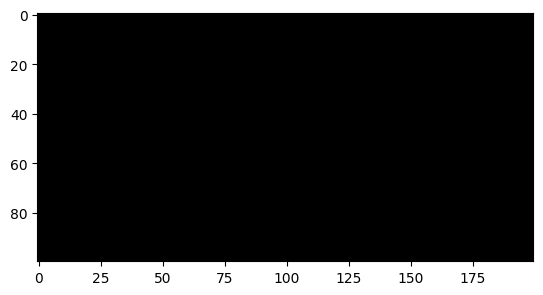

In [152]:
# Create and visualize a black image
x = torch.zeros(100, 200, 3)

%matplotlib inline
import matplotlib.pyplot as plt
img = plt.imshow(x)

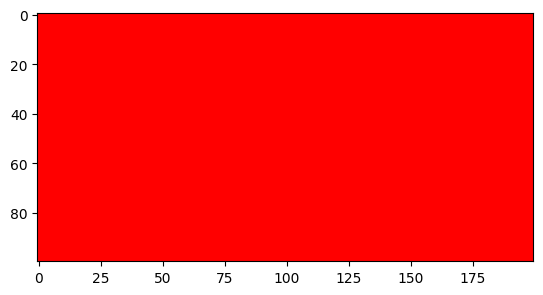

In [158]:
# Write here your solution
x[:,:,0]=1

%matplotlib inline
import matplotlib.pyplot as plt
img = plt.imshow(x)

In [ ]:
# @title 👀 Solution


x[:, :, 0] = 1
img = plt.imshow(x)

> **EXERCISE**
>
> You are given the GitHub logo $X \in \mathbb{R}^{560 \times 560}$.  Assume the logo is in gray scale, with the color $c \in [0, 1]$ (remember 0 $\to$ black).
>
> 1. Change the black-ish color into light gray: $0.8$.
> 2. Then draw a diagonal and anti-diagonal black line (i.e. an X) on the new image, to mark that the new logo is wrong.

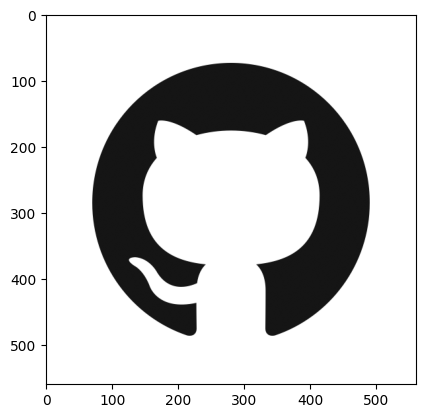

In [159]:
from skimage import io

image = io.imread('https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png', as_gray=True)
_ = plt.imshow(image, cmap='gray', vmin=0, vmax=1)

In [191]:
# prova

x = torch.eye(4)
print(x)
x = (x==1).int()*0.8
print(x)


tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])
tensor([[0.8000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.8000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.8000]])


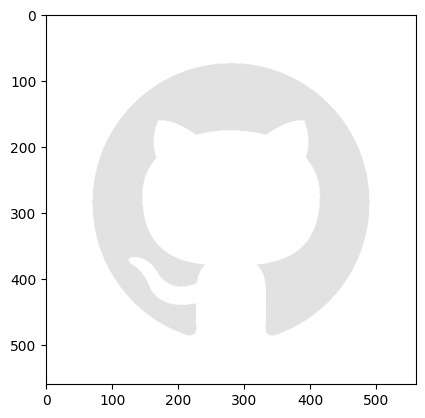

In [214]:
# Change the black into light-gray
X = torch.from_numpy(image.copy())  # PyTorch CPU and Numpy share the memory!
X = (X<1).int()*0.8 + X

_ = plt.imshow(X, cmap='gray', vmin=0, vmax=1)

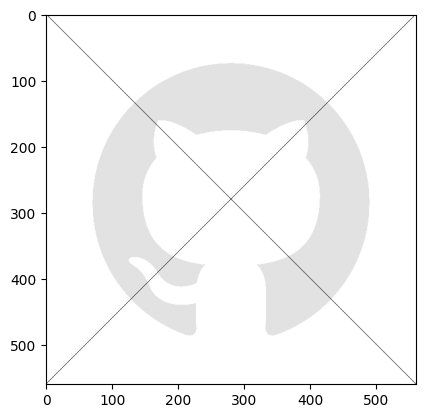

In [229]:
# # Mark the new image as wrong with a big black X
X[torch.cat((torch.arange(X.shape[0]),torch.arange(X.shape[0]))), torch.cat((torch.arange(X.shape[0]),torch.arange(X.shape[0]-1,-1,-1)))]=0

_ = plt.imshow(X, cmap='gray', vmin=0, vmax=1)

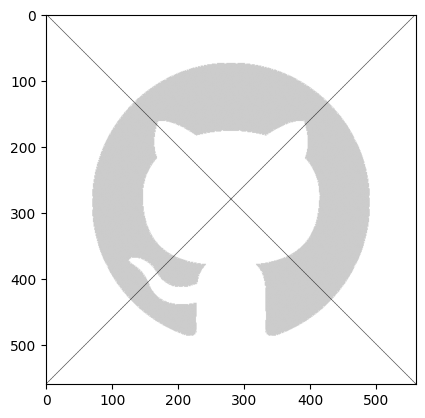

In [196]:
# @title 👀 Solution


X[X < 1] = 0.8
X[torch.arange(X.shape[0]), torch.arange(X.shape[1])] = 0
X[torch.arange(X.shape[0] - 1, -1, -1), torch.arange(X.shape[1])] = 0

_ = plt.imshow(X, cmap='gray', vmin=0, vmax=1)